# **Assignment :- Processing Map Data with Metadata**

Submitted by - Anil Kushwaha

Mo.no - 9829159839

Email - kumaranil48309@gmail.com

# **Objective:**
**You have been provided with two JSON files:**

**1. The first JSON contains location identifiers (id), latitude, and longitude.**

**2. The second JSON contains additional metadata related to each location identifier.**

In [23]:
import json
import pandas as pd

# Sample JSON data (replace with file reading if needed)
locations_json = '''
[
    {"id": "loc_01", "latitude": 37.7749, "longitude": -122.4194},
    {"id": "loc_04", "latitude": 27.8749, "longitude": 122.4194},
    {"id": "loc_05", "latitude": 57.2749, "longitude": -112.4344},
    {"id": "loc_06", "latitude": 14.0522, "longitude": -119.2531},
    {"id": "loc_07", "latitude": 64.0522, "longitude": -108.2330},
    {"id": "loc_02", "latitude": 34.0522, "longitude": -118.2437},
    {"id": "loc_08", "latitude": 24.0522, "longitude": -168.2197},
    {"id": "loc_03", "latitude": 40.7128, "longitude": -74.0060}
]
'''

metadata_json = '''
[
    {"id": "loc_01", "type": "restaurant", "rating": 4.5, "reviews": 120},
    {"id": "loc_04", "type": "restaurant", "rating": 4.1, "reviews": 500},
    {"id": "loc_05", "type": "restaurant", "rating": 3.7, "reviews": 110},
    {"id": "loc_02", "type": "hotel", "rating": 4.2, "reviews": 200},
    {"id": "loc_06", "type": "hotel", "rating": 4.0, "reviews": 700},
    {"id": "loc_07", "type": "hotel", "rating": 2.0, "reviews": 900},
    {"id": "loc_03", "type": "cafe", "rating": 4.7, "reviews": 150},
    {"id": "loc_08", "type": "cafe", "rating": 4.5, "reviews": 750}
]
'''

# Load JSON into Python lists
locations = json.loads(locations_json)
metadata = json.loads(metadata_json)

In [24]:
# Convert JSON to Pandas DataFrames
df_locations = pd.DataFrame(locations)
df_metadata = pd.DataFrame(metadata)

# Display data
print("Locations DataFrame:\n", df_locations)
print("\nMetadata DataFrame:\n", df_metadata)

Locations DataFrame:
        id  latitude  longitude
0  loc_01   37.7749  -122.4194
1  loc_04   27.8749   122.4194
2  loc_05   57.2749  -112.4344
3  loc_06   14.0522  -119.2531
4  loc_07   64.0522  -108.2330
5  loc_02   34.0522  -118.2437
6  loc_08   24.0522  -168.2197
7  loc_03   40.7128   -74.0060

Metadata DataFrame:
        id        type  rating  reviews
0  loc_01  restaurant     4.5      120
1  loc_04  restaurant     4.1      500
2  loc_05  restaurant     3.7      110
3  loc_02       hotel     4.2      200
4  loc_06       hotel     4.0      700
5  loc_07       hotel     2.0      900
6  loc_03        cafe     4.7      150
7  loc_08        cafe     4.5      750


In [25]:
# Merge DataFrames on 'id'
df_merged = pd.merge(df_locations, df_metadata, on="id", how="left")

# Display the merged data
print("\nMerged DataFrame:\n", df_merged)


Merged DataFrame:
        id  latitude  longitude        type  rating  reviews
0  loc_01   37.7749  -122.4194  restaurant     4.5      120
1  loc_04   27.8749   122.4194  restaurant     4.1      500
2  loc_05   57.2749  -112.4344  restaurant     3.7      110
3  loc_06   14.0522  -119.2531       hotel     4.0      700
4  loc_07   64.0522  -108.2330       hotel     2.0      900
5  loc_02   34.0522  -118.2437       hotel     4.2      200
6  loc_08   24.0522  -168.2197        cafe     4.5      750
7  loc_03   40.7128   -74.0060        cafe     4.7      150


In [26]:
# Count valid locations per type
valid_points_count = df_merged["type"].value_counts()
print("\nValid Points Per Type:\n", valid_points_count)


Valid Points Per Type:
 type
restaurant    3
hotel         3
cafe          2
Name: count, dtype: int64


In [27]:
# Calculate the average rating per type
avg_rating = df_merged.groupby("type")["rating"].mean()
print("\nAverage Rating Per Type:\n", avg_rating)


Average Rating Per Type:
 type
cafe          4.6
hotel         3.4
restaurant    4.1
Name: rating, dtype: float64


In [28]:
# Find the location with the highest number of reviews
max_reviews = df_merged.loc[df_merged["reviews"].idxmax()]
print("\nLocation with the Highest Reviews:\n", max_reviews)


Location with the Highest Reviews:
 id            loc_07
latitude     64.0522
longitude   -108.233
type           hotel
rating           2.0
reviews          900
Name: 4, dtype: object


In [29]:
# Find locations with missing values
incomplete_data = df_merged[df_merged.isnull().any(axis=1)]
print("\nLocations with Incomplete Data:\n", incomplete_data)


Locations with Incomplete Data:
 Empty DataFrame
Columns: [id, latitude, longitude, type, rating, reviews]
Index: []


# **Visualize data**

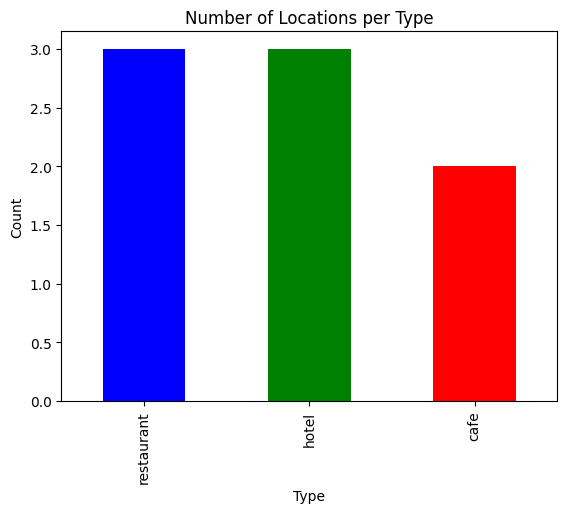

In [30]:
import matplotlib.pyplot as plt

# Bar chart for valid locations per type
valid_points_count.plot(kind="bar", color=["blue", "green", "red"])
plt.title("Number of Locations per Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()